# Seoul Bike Sharing Demand
## Phase 1: Data Exploration and Visualisation

#### Group Name: Group92

#### Junwon Lee (s3970149)

#### 

## Table of Contents

* [1. Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
  
* [2. Setting Objectives](#Setting-Objectives)

* [3. Data Cleaning and Pre-processing](#Data-Cleaning-and-Pre-processing)

* [4. Data Exploration and Visualization](#Data-Exploration-and-Visualization)

* [5. Summary and Conclusion](#Summary-and-Conclusion)

* [6. References](#References)

## Introduction <a id='itr'></a>

### Dataset Source

The Seoul Metropolitan Government's bike-sharing demand dataset used in this analysis was collected by the UC Irvine Machine Learning Repository. The dataset includes hourly and daily data on the number of rental bicycles and environmental conditions in Seoul from 2017 to 2018.



### Dataset Details

This dataset focuses on analyzing the demand for bicycle rental in Seoul based on various environmental and temporal factors. It consists of 8,760 rows and 14 columns, including the number of rental bicycles, date, time, weather conditions (temperature, humidity, wind speed), and seasonal information.

**Dataset Retrieval**

-  I saved the dataset from the UCI ML Repository and load the dataset on Local storage.

-  I display 10 randomly sampled instances from the dataset.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import io
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBacken.figure_format = 'retina'
plt.style.use("seaborn")

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("/Users/lee-jun-won/Python/Phase1_Group92.csv", encoding='CP949')

In [4]:
df.sample(10, random_state=999)

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
387,17/12/2017,100,3,-9.0,40,3.1,2000,-20.1,0.00,0.0,0.0,Winter,No Holiday,Yes
5265,08/07/2018,787,9,20.8,51,1.5,1973,10.2,1.65,0.0,0.0,Summer,No Holiday,Yes
6508,29/08/2018,128,4,24.6,86,4.0,1968,22.0,0.00,0.0,0.0,Summer,No Holiday,Yes
1601,05/02/2018,225,17,-6.4,28,4.5,2000,-21.9,0.81,0.0,0.0,Winter,No Holiday,Yes
1693,09/02/2018,268,13,2.6,27,0.8,1120,-14.5,0.82,0.0,0.0,Winter,No Holiday,Yes
1374,27/01/2018,33,6,-15.3,47,0.7,1921,-24.0,0.00,0.0,0.3,Winter,No Holiday,Yes
8204,07/11/2018,1062,20,13.3,77,1.6,833,9.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
484,21/12/2017,58,4,-3.6,91,1.2,241,-4.8,0.00,0.0,2.2,Winter,No Holiday,Yes
3021,05/04/2018,99,21,7.3,96,1.5,749,6.6,0.00,1.0,0.0,Spring,No Holiday,Yes
6133,13/08/2018,698,13,33.0,54,1.7,1458,22.4,1.23,0.0,0.0,Summer,No Holiday,Yes


In [5]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


### Dataset Features

The features of this dataset are as follows. These data features and descriptions were referenced in UCI repository. It is possible to understand the composition of the data by checking the features of the dataset.

In [6]:
# Define data features
features = {
    'Variable Name': ['Date', 'Rented Bike Count', 'Hour', 'Temperature', 'Humidity', 'Wind Speed', 'Visibility', 'Dew Point Temperature', 'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day'],
    'Type': ['Date', 'Integer', 'Integer', 'Continuous', 'Integer', 'Continuous', 'Integer', 'Continuous', 'Continuous', 'Integer', 'Integer', 'Categorical', 'Binary', 'Binary'],
    'Units': ['-', '-', '-', '°C', '%', 'm/s', '10m', '°C', 'MJ/m2', 'mm', 'cm', '-', '-', '-'],
    'Description': ['\'yyyy-mm-dd\'', 'rented at each hour', 'Hour of the day', 'Celsius', 'humidity', 'Wind speed', 'Visibility in units of 10 m', 'Dew point temperature in Celsius', 'Solar radiation measured', 'Rainfall', 'Snowfall in centimeters', 'Category for season', 'day a holiday', 'rental service']
}

df_features = pd.DataFrame(features)

df_features

,Variable Name,Type,Units,Description
0,Date,Date,-,'yyyy-mm-dd'
1,Rented Bike Count,Integer,-,rented at each hour
2,Hour,Integer,-,Hour of the day
3,Temperature,Continuous,°C,Celsius
4,Humidity,Integer,%,humidity
5,Wind Speed,Continuous,m/s,Wind speed
6,Visibility,Integer,10m,Visibility in units of 10 m
7,Dew Point Temperature,Continuous,°C,Dew point temperature in Celsius
8,Solar Radiation,Continuous,MJ/m2,Solar radiation measured
9,Rainfall,Integer,mm,Rainfall


### Target Feature

The target feature of the dataset I want to analyze is 'Rented Bike Count', a numerical variable representing the number of rental bicycles rented at each time. Building a regression model that predicts the number of rental bicycles over time based on the various environmental and temporal characteristics provided.

## Setting Objectives

Seoul has a well-established bike-sharing system around the Han River that crosses Seoul, providing convenient and environmentally friendly means of transportation for both residents and tourists. Analyzing the demand for bike-sharing services in Seoul can provide valuable insights into improving service quality and optimizing resources for those who use bike-sharing services.

The main purpose of the analysis of the Seoul bicycle sharing system is as follows.

(1) Predicting the demand for bicycle rental in Seoul based on various factors such as time, day of the week, and weather.
(2) Based on the analysis in (1), identify the main factors that have a significant impact on the demand for bicycle rental.

The analysis of the Seoul bicycle sharing system aims to perform data analysis using basic technical statistical theory and data visualization techniques. In this process, the initial stage should secure the quality and relevance of the dataset for more accurate analysis. Therefore, it goes through data cleaning and pre-processing.

Although there may be correlations due to seasonal impacts, major events, or other external factors in the real world, it is important that this analysis assumes and conducts independence among bike rental observations. By understanding the patterns and dynamics of bike rental demand, city authorities can make informed decisions regarding infrastructure improvements, service expansion, and resource allocation to enhance the overall bike experience in Seoul.

## Data Cleaning and Pre-processing


### Data Cleaning Steps

*   Drop less impact features in dataset
*   Change the Column name (Failed to convert into Eng.)
*   Check for missing values
*   Add '_' instead of 'White space'

First, check the summary and column of the dataset to see which dataset it consists of.

In [7]:
df.describe()

,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(캜),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [8]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(캜)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(캜)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

I think `Dew point temperature` and `Solar Radiation` have less impact on the analysis of bicycle sharing in Seoul according to various factors than other descriptions. (Judging that it is pure scientific data) In conclusion, it is decided to remove the two columns.

In [9]:
# Drop 'less impact' two columns

df = df.drop(columns=["Dew point temperature(캜)","Solar Radiation (MJ/m2)"])

In [10]:
df

,Date,Rented Bike Count,Hour,Temperature(캜),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes


1. Delete special symbols for features that contain special symbols in the column, including Temperatures.
2. To remove 'White space' between column name, use '_' instead of 'White space'


In [11]:
# Remove special symbol or repalce with '_'

df.rename(columns={'Temperature(캜)': 'Temperature'}, inplace=True)
df.rename(columns={'Humidity(%)': 'Humidity'}, inplace=True)
df.rename(columns={'Wind speed (m/s)': 'Wind speed'}, inplace=True)
df.rename(columns={'Visibility (10m)': 'Visibility_10m'}, inplace=True)
df.rename(columns={'Rainfall(mm)': 'Rainfall_mm'}, inplace=True)
df.rename(columns={'Snowfall (cm)': 'Snowfall_cm'}, inplace=True)

# Add '_' instead of 'White space'

df.rename(columns={'Rented Bike Count': 'Rented_Bike_Count'}, inplace=True)
df.rename(columns={'Wind speed': 'Wind_speed'}, inplace=True)
df.rename(columns={'Functioning Day': 'Functioning_Day'}, inplace=True)


In [12]:
df

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility_10m,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes


When it comes to data column pre-processing, specifically converting a column into datetime format, there are several steps involved to ensure accuracy and compatibility with further analysis.

In [13]:
# Need to change 'Date' column as datetime format

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.drop('Date', axis = 1, inplace=True)

In [14]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility_10m,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Functioning_Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,Winter,No Holiday,Yes,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8756,764,20,3.4,37,2.3,2000,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8757,694,21,2.6,39,0.3,1968,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30
8758,712,22,2.1,41,1.0,1859,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30


In [15]:
# Check the missing values of the data.

df.isnull().sum()

Rented_Bike_Count    0
Hour                 0
Temperature          0
Humidity             0
Wind_speed           0
Visibility_10m       0
Rainfall_mm          0
Snowfall_cm          0
Seasons              0
Holiday              0
Functioning_Day      0
Year                 0
Month                0
Day                  0
dtype: int64

Based on dataset, There is no missing value at all.

In [16]:
df.describe()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility_10m,Rainfall_mm,Snowfall_cm,Year,Month,Day
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,0.148687,0.075068,2017.915068,6.526027,15.720548
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,1.128193,0.436746,0.278796,3.448048,8.796749
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,0.000000,0.000000,2017.000000,1.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,0.000000,0.000000,2018.000000,4.000000,8.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,0.000000,0.000000,2018.000000,7.000000,16.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,0.000000,0.000000,2018.000000,10.000000,23.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,35.000000,8.800000,2018.000000,12.000000,31.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  8760 non-null   int64  
 1   Hour               8760 non-null   int64  
 2   Temperature        8760 non-null   float64
 3   Humidity           8760 non-null   int64  
 4   Wind_speed         8760 non-null   float64
 5   Visibility_10m     8760 non-null   int64  
 6   Rainfall_mm        8760 non-null   float64
 7   Snowfall_cm        8760 non-null   float64
 8   Seasons            8760 non-null   object 
 9   Holiday            8760 non-null   object 
 10  Functioning_Day    8760 non-null   object 
 11  Year               8760 non-null   int32  
 12  Month              8760 non-null   int32  
 13  Day                8760 non-null   int32  
dtypes: float64(4), int32(3), int64(4), object(3)
memory usage: 855.6+ KB


Categorical variable encoding: As a result of checking the data information, 'Seasons', 'Holiday', and 'Functioning_Day' columns as object types are categorical variables and are encoded as numbers. One-hot encoding is performed by label encoding due to an increase in the number of columns.

In [18]:
df = df.reset_index(drop=True)

In [19]:
# Make label encoder instance

label_encoder = LabelEncoder()

# Need to change those of three columns as follow

encode_columns = ['Seasons', 'Holiday', 'Functioning_Day']

for col in encode_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [20]:
df

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility_10m,Rainfall_mm,Snowfall_cm,Seasons,Holiday,Functioning_Day,Year,Month,Day
0,254,0,-5.2,37,2.2,2000,0.0,0.0,3,1,1,2017,12,1
1,204,1,-5.5,38,0.8,2000,0.0,0.0,3,1,1,2017,12,1
2,173,2,-6.0,39,1.0,2000,0.0,0.0,3,1,1,2017,12,1
3,107,3,-6.2,40,0.9,2000,0.0,0.0,3,1,1,2017,12,1
4,78,4,-6.0,36,2.3,2000,0.0,0.0,3,1,1,2017,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0,1,1,2018,11,30
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0,1,1,2018,11,30
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0,1,1,2018,11,30
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0,1,1,2018,11,30


## Data Exploration and Visualization

After completing the preprocessing steps for data analysis, exploratory data analysis through visualization is conducted. This process helps in understanding the characteristics of the data and the relationships between different data points.

I decided Rented_bike_count as the basis for basic data comparison. The reason is because it is an analysis of bike share in Seoul, so how much bikes are rented is the most important thing.

Based on this, short-variable visualization, two-variable visualization, and three-variable visualization are performed to confirm the relationship and influence between the various variables through visualization.

### A Single Variable Visualization



#### 1. Rented_Bike_Count: Histogram

Analyzing the data by month reveals a relatively stable trend in bike-sharing rentals throughout the year. Despite seasonal variations in weather and other factors, the overall demand for public bicycles remains consistent across different months.

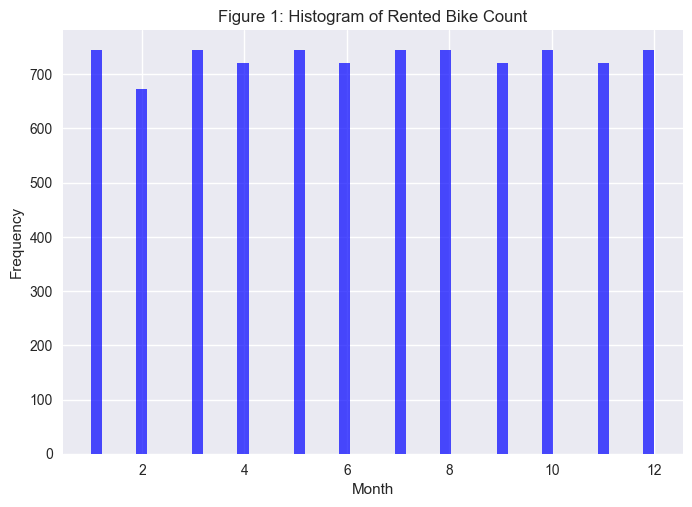

In [21]:
# Histogram of Month

plt.hist(df['Month'], bins=50, color='blue', alpha=0.7)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Figure 1: Histogram of Rented Bike Count')
plt.show()

#### 2. Rainfall_mm: Scatter plot

When examining the distribution of bicycle rentals based on precipitation levels, a clear trend emerges. The majority of bicycle rentals are concentrated in precipitation ranges below 5-10mm. This suggests that light to moderate rainfall does not significantly deter individuals from using public bicycles. However, as precipitation levels increase beyond this range, there is a noticeable decline in bicycle rentals.

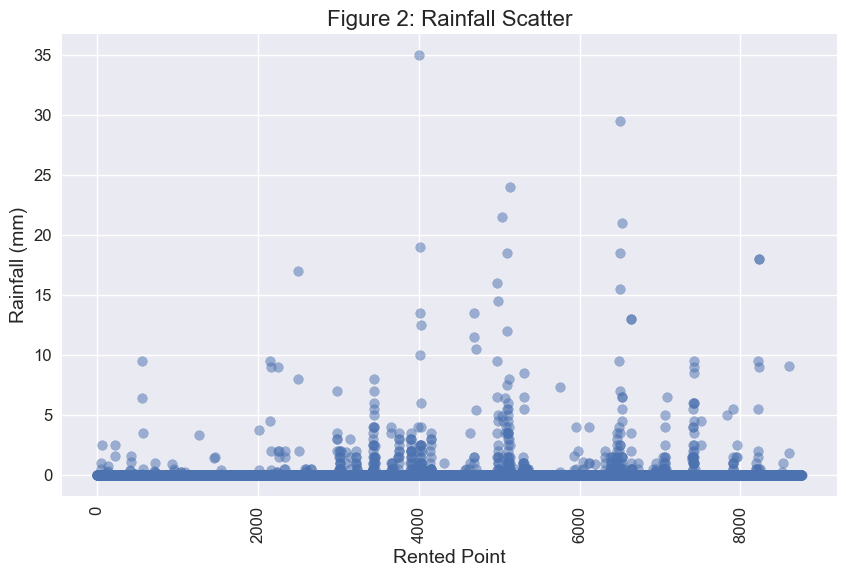

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df['Rainfall_mm'], alpha=0.5)
plt.title('Figure 2: Rainfall Scatter', fontsize=16)
plt.xlabel('Rented Point', fontsize=14)
plt.ylabel('Rainfall (mm)', fontsize=14)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.show()

### Two-Variable Visualization

In the visualization analysis between the two variables, (1) the relationship between Rented_Bike_Count, temperature, and (2) the relationship between Rainfall_mm and Wind_speed are checked through a scatterplot.

#### 1. Scatterplot relationship between Rented_Bike_Count and Temp.

According to the results of the scatter plot analysis, bicycle rental is actively performed when the temperature is 15 degrees to 30 degrees or less. This is a natural result. This is because riding a bicycle is an outdoor activity, so 15 to 30 degrees is an appropriate temperature.

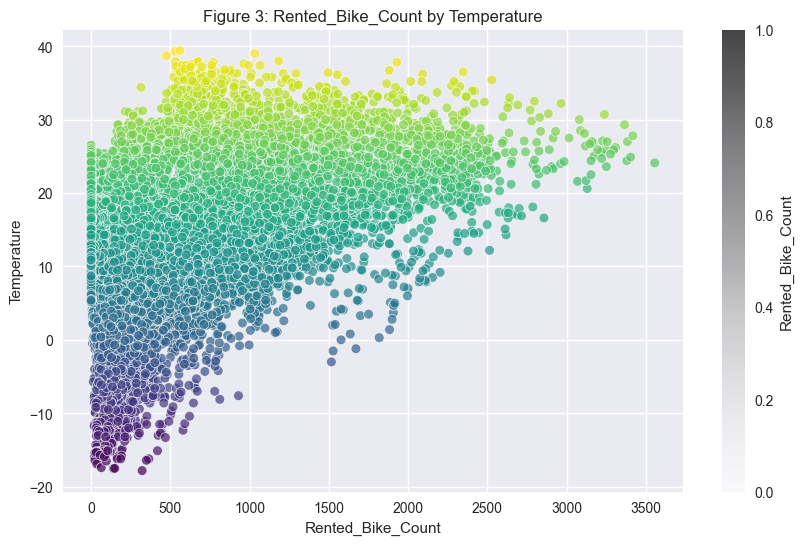

In [23]:
# Scatterplot of two variables

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Rented_Bike_Count', y='Temperature', hue='Temperature', palette='viridis', alpha=0.7)
plt.colorbar(scatter.get_children()[0], label='Rented_Bike_Count')
plt.title('Figure 3: Rented_Bike_Count by Temperature')
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Temperature')
plt.legend().remove()
plt.show()

#### 2. Scatterplot relationship between Rented_Bike_Count and Seasons

This scatterplot can check the distribution of bike rentals according to the season. Spring, summer, and fall are relatively similar, but bike rentals in winter drop significantly. This is because winter in Korea inevitably reduces the amount of bike use because it snows and goes down to sub-zero temperatures.

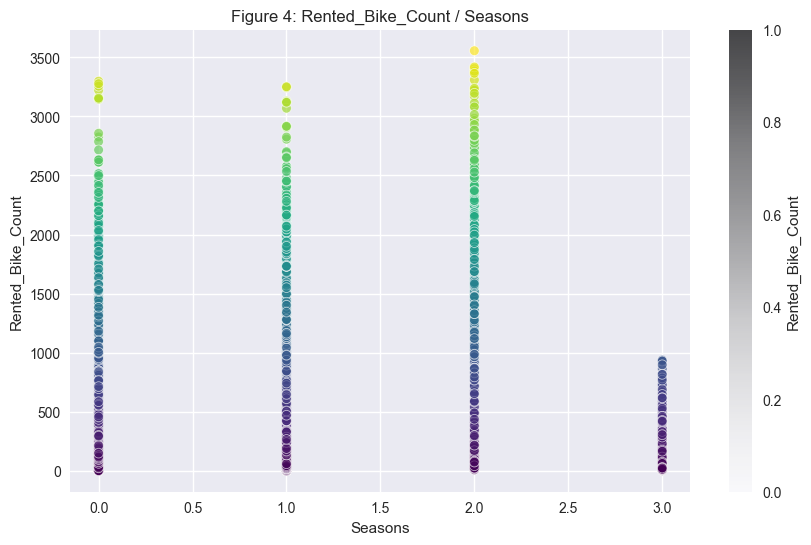

In [24]:
# Scatterplot of two variables

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=df, x='Seasons', y='Rented_Bike_Count', hue='Rented_Bike_Count', palette='viridis', alpha=0.7)
plt.colorbar(scatter.get_children()[0], label='Rented_Bike_Count')
plt.title('Figure 4: Rented_Bike_Count / Seasons')
plt.xlabel('Seasons')
plt.ylabel('Rented_Bike_Count')
plt.legend().remove()
plt.show()

### Three-Variable Visualization

#### 1. 3D scatterplot of Rented_Bike_Count with Temp and Humidity

A 3D scatterplot plot is used to express the relationship between the three variables. Since all three variables have a wide distribution range, a 3D scatterplot plot was selected and visualized.

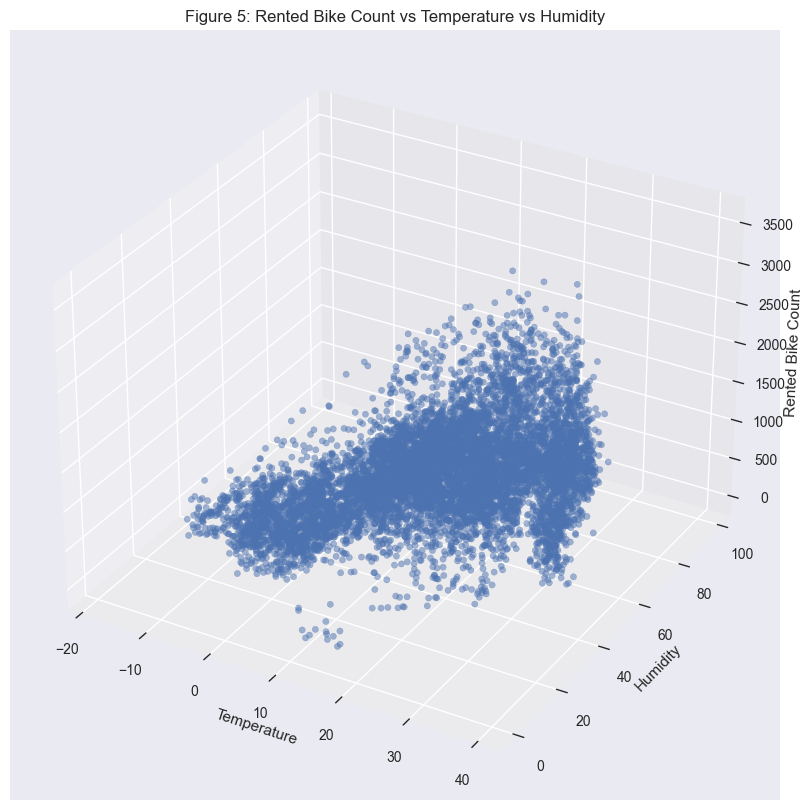

In [25]:
# Show 3D scatterplot

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Temperature'], df['Humidity'], df['Rented_Bike_Count'], alpha=0.5)
ax.set_title('Figure 5: Rented Bike Count vs Temperature vs Humidity')
ax.set_xlabel('Temperature')
ax.set_ylabel('Humidity')
ax.set_zlabel('Rented Bike Count')
plt.show()

#### 2. Histograms of Rented_Bike_Count with Hour and Holiday

It's observed that the frequency of bike rentals is higher on holidays, even during the same hours. This is likely because on non-holidays, bikes are mainly used for commuting to work or returning home, whereas on holidays, they are often used for activities like picnics.

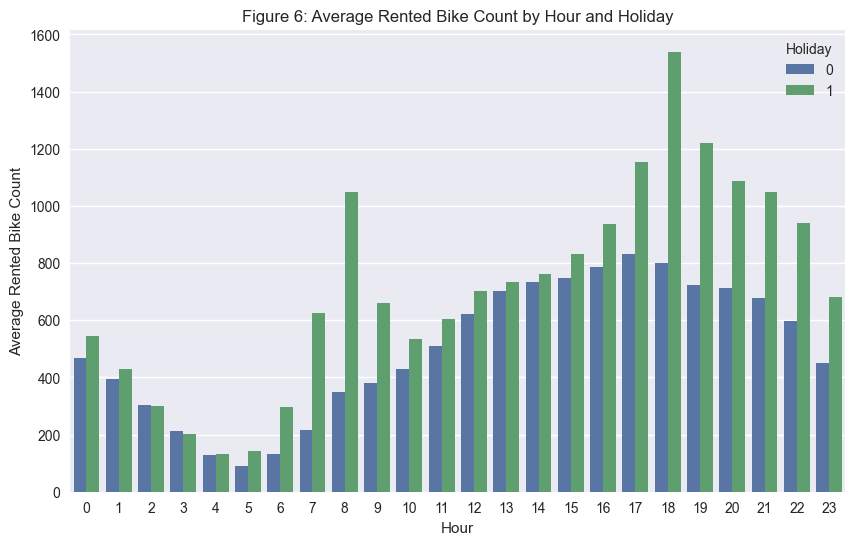

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Holiday', ci=None)
plt.title('Figure 6: Average Rented Bike Count by Hour and Holiday')
plt.xlabel('Hour')
plt.ylabel('Average Rented Bike Count')
plt.legend(title='Holiday')
plt.show()

#### 3. Boxplot of Rented_Bike_Count with Hour and Holiday

I compared the rental bike count with time and holiday status data features using box plots. From 0 to 4 hours, there are more non-holiday days, indicating a higher usage during commuting hours. However, from 5 hours onwards, there are many time slots where holiday days show higher usage of public bicycle rental services.

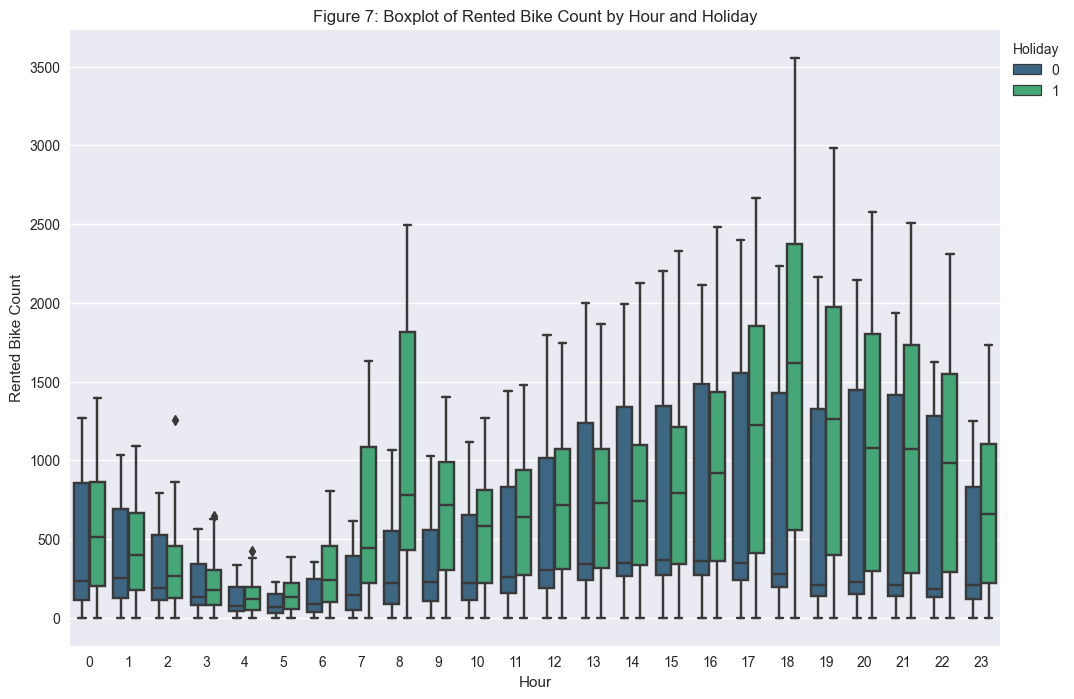

In [27]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Hour', y='Rented_Bike_Count', hue='Holiday', palette='viridis')
plt.title('Figure 7: Boxplot of Rented Bike Count by Hour and Holiday')
plt.xlabel('Hour')
plt.ylabel('Rented Bike Count')
plt.legend(title='Holiday', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Summary and Conclusion

The analysis of public bicycle rentals in Seoul, South Korea, aimed to understand usage patterns and identify areas for improvement in the bicycle rental system. This analysis was conducted using a well-prepared dataset sourced from UCI, which underwent preprocessing to ensure data quality.

The initial steps involved in the analysis included data cleaning and preprocessing. Unnecessary columns were removed, and missing values were handled, ensuring the dataset's integrity. Column names were also modified for easier analysis, laying a solid foundation for subsequent exploration.

Data visualization played a crucial role in uncovering insights from the dataset. Various variables, including weather conditions, holiday status, and seasonal variations, were compared against bicycle rental counts. The visualizations revealed several key trends:

Weather Influence: Rain significantly impacted bicycle rentals, leading to lower rental numbers during rainy days. This finding suggests the need for weather-aware strategies, such as increasing bicycle availability during favorable weather conditions or providing alternative transportation options during inclement weather.
Holiday Trends: Holidays showed a substantial increase in bicycle rental hours and counts, indicating the system's potential for leisure and recreational use. Tailoring promotions or events to coincide with holidays could further boost rental numbers and promote cycling as a leisure activity.
Seasonal Variations: Seasonal changes, particularly during winter, led to a decrease in bicycle rentals due to heavy snowfall and low temperatures. However, rentals still occurred during winter months, highlighting the importance of safety education and ensuring infrastructure resilience to weather challenges.
In conclusion, the analysis provides actionable insights for improving the public bicycle rental system in Seoul. Strategies such as targeted promotions during holidays, weather-responsive management, and continuous safety education can enhance user experience and promote cycling as a sustainable transportation option.

Moreover, leveraging data analytics to predict high-demand periods and optimize supply can ensure efficient resource allocation. Collaborations with tourism agencies and local communities can also expand the reach of the bicycle rental system, catering to both commuters and tourists.

By implementing these recommendations and adopting a data-driven approach, Seoul can foster a positive cycling culture, reduce traffic congestion, and contribute to environmental sustainability. Continued monitoring and evaluation will be essential to adapt strategies and meet evolving user needs, ultimately creating a more vibrant and accessible urban environment for all.

## References

[1] Eren, E., & Uz, V. E. (2019). A review on bike-sharing: The factors affecting bike-sharing demand. Sustainable Cities and Society, 54, 101882. https://doi.org/10.1016/j.scs.2019.101882

[2] García, S., Luengo, J., & Herrera, F. (2015). Data preprocessing in data mining. Springer.

[3] Guo, Y., Yang, L., & Chen, Y. (2022). Bike Share Usage and the Built Environment: A Review. Frontiers in Public Health, 10. https://doi.org/10.3389/fpubh.2022.848169

[4] Kamiran, F., & Calders, T. (2011). Data preprocessing techniques for classification without discrimination. Knowledge and Information Systems, 33(1), 1–33. https://doi.org/10.1007/s10115-011-0463-8

[5] Zhang, H., Huang, M., Yang, J., & Sun, W. (2021). A Data Preprocessing Method for Automatic Modulation Classification Based on CNN. IEEE Communications Letters, 25(4), 1206–1210. https://doi.org/10.1109/lcomm.2020.3044755

[6] Zhao, J., Wang, W., & Sheng, C. (2018). Data Preprocessing Techniques. Information Fusion and Data Science, 13–52. https://doi.org/10.1007/978-3-319-94051-9_2